In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd,np,plt,sns

(<module 'pandas' from 'C:\\Users\\amr20\\anaconda3\\lib\\site-packages\\pandas\\__init__.py'>,
 <module 'numpy' from 'C:\\Users\\amr20\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>,
 <module 'matplotlib.pyplot' from 'C:\\Users\\amr20\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 <module 'seaborn' from 'C:\\Users\\amr20\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>)

In [3]:
from sklearn.datasets import load_boston

In [14]:
boston = load_boston()

C:\Users\amr20\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [15]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [16]:
boston.DESCR.split('\n')

['.. _boston_dataset:',
 '',
 'Boston house prices dataset',
 '---------------------------',
 '',
 '**Data Set Characteristics:**  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways

In [18]:
dataset = pd.DataFrame(data=boston.data,columns=boston.feature_names)

In [19]:
dataset['House_Price'] = boston.target

In [20]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [21]:
dataset.isna().sum().sum()

0

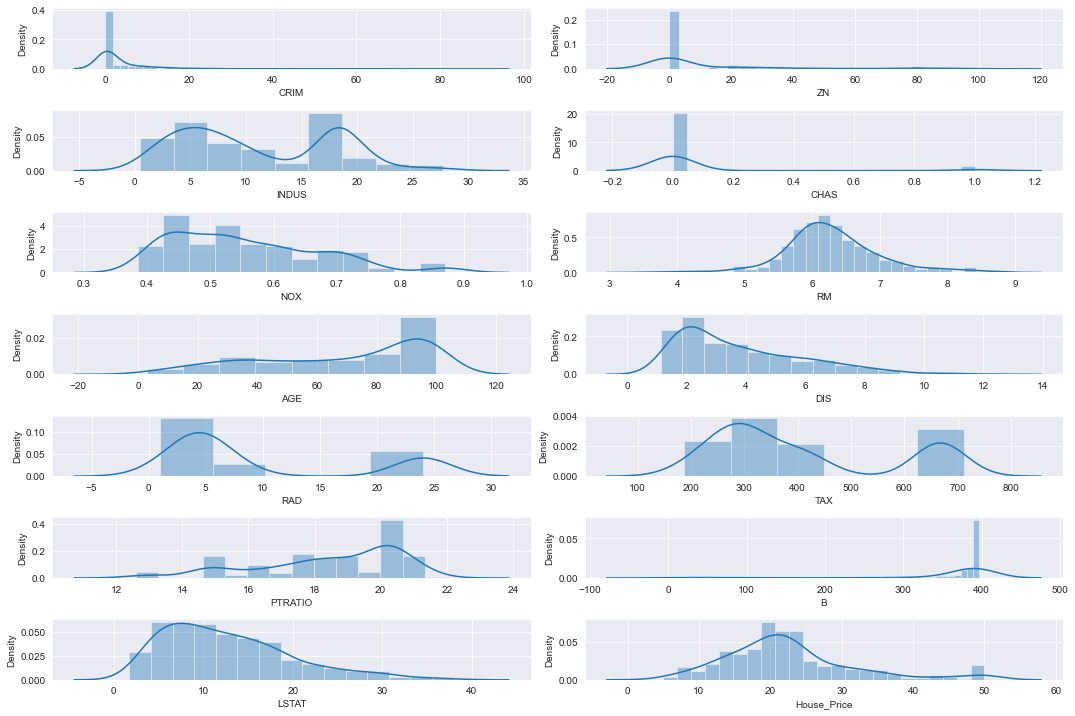

In [25]:
plt.figure(figsize=(15,10))
j = 1
for col in dataset.columns:
    plt.subplot(7,2,j)
    sns.distplot(dataset[col])
    j+=1

plt.tight_layout(pad=0.9)
plt.show()

In [231]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [407]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=41)

In [408]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=2,min_samples_split=6)
tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2, min_samples_split=6)

In [409]:
y_pred = tree.predict(X_test)

In [410]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)

In [411]:
mse

40.234700216617306

In [412]:
print(f'R2_Score = {r2*100}%')

R2_Score = -16.073361088218817%


In [413]:
from sklearn.linear_model import Lasso, Ridge
tree = Lasso()
tree.fit(X_train,y_train)

Lasso()

In [414]:
y_pred = tree.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred=y_pred, y_true=y_test)
r2*100

60.732431273598856

In [415]:
y_pred = tree.predict(X_train)
mse = mean_squared_error(y_pred, y_train)
r2 = r2_score(y_pred=y_pred,y_true= y_train)
r2*100

69.19753303056537

In [416]:
tree = Ridge()
tree.fit(X_train,y_train)

Ridge()

In [417]:
y_pred = tree.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_true=y_test,y_pred=y_pred)
r2*100

57.98118465670527

In [418]:
y_pred = tree.predict(X_train)
mse = mean_squared_error(y_pred, y_train)
r2 = r2_score(y_true=y_train,y_pred= y_pred)
r2*100

74.57214583895858

In [419]:
data = pd.read_csv('data/AutoMobile PreProcessed.csv')

In [420]:
data

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm_5200,peak-rpm_5250,peak-rpm_5300,peak-rpm_5400,peak-rpm_5500,peak-rpm_5600,peak-rpm_5800,peak-rpm_5900,peak-rpm_6000,peak-rpm_6600
0,3,125.64359,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,3,125.64359,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,1,125.64359,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,0,0,0
3,2,164.00000,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,1,0,0,0,0,0
4,2,164.00000,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.00000,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,1,0,0,0,0,0,0
197,-1,95.00000,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,1,0,0,0,0,0,0,0
198,-1,95.00000,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,1,0,0,0,0,0
199,-1,95.00000,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,0,0,0,0,0


In [451]:
X2 = data.drop(['price'],axis=1).values
y2 = data.price.values

In [452]:
train_X,test_X,train_y,test_y = train_test_split(X2,y2, test_size=0.25)

In [462]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
train_y = sc.fit_transform(train_y.reshape(-1,1))
test_y = sc.fit_transform(test_y.reshape(-1,1))

In [463]:
regressor = DecisionTreeRegressor()
regressor.fit(train_X, train_y)

DecisionTreeRegressor()

In [464]:
pred_y = regressor.predict(test_X)

In [468]:
r = mean_squared_error(test_y,pred_y)
r2_score(test_y,pred_y)*100

83.00706816188654

In [443]:
X2

array([[  3.       , 125.6435897,  88.6      , ...,   0.       ,
          0.       ,   0.       ],
       [  3.       , 125.6435897,  88.6      , ...,   0.       ,
          0.       ,   0.       ],
       [  1.       , 125.6435897,  94.5      , ...,   0.       ,
          0.       ,   0.       ],
       ...,
       [ -1.       ,  95.       , 109.1      , ...,   0.       ,
          0.       ,   0.       ],
       [ -1.       ,  95.       , 109.1      , ...,   0.       ,
          0.       ,   0.       ],
       [ -1.       ,  95.       , 109.1      , ...,   0.       ,
          0.       ,   0.       ]])

In [444]:
y2

array([13495, 16500, 16500, 13950, 17450, 15250, 17710, 18920, 23875,
       16430, 16925, 20970, 21105, 24565, 30760, 41315, 36880,  5151,
        6295,  6575,  5572,  6377,  7957,  6229,  6692,  7609,  8558,
        8921, 12964,  6479,  6855,  5399,  6529,  7129,  7295,  7295,
        7895,  9095,  8845, 10295, 12945, 10345,  6785, 11048, 32250,
       35550, 36000,  5195,  6095,  6795,  6695,  7395, 10945, 11845,
       13645, 15645,  8845,  8495, 10595, 10245, 10795, 11245, 18280,
       18344, 25552, 28248, 28176, 31600, 34184, 35056, 40960, 45400,
       16503,  5389,  6189,  6669,  7689,  9959,  8499, 12629, 14869,
       14489,  6989,  8189,  9279,  9279,  5499,  7099,  6649,  6849,
        7349,  7299,  7799,  7499,  7999,  8249,  8949,  9549, 13499,
       14399, 13499, 17199, 19699, 18399, 11900, 13200, 12440, 13860,
       15580, 16900, 16695, 17075, 16630, 17950, 18150,  5572,  7957,
        6229,  6692,  7609,  8921, 12764, 22018, 32528, 34028, 37028,
        9295,  9895,